<a href="https://colab.research.google.com/github/swarajmann/Swaraj-/blob/master/472A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comp 472 Assignment 1


# Process
Step 1 : Dataset Preparation & Analysis  
* 1.1 : Preprocessing  
* 1.2 : Extraction and plotting    

Step 2 : Words as Features   

* 2.1 : Size of Vocabulary
* 2.2 : Training ang Testing Splits
* 2.3 : Train and Test Classifiers
* 2.4 : Performance of Classifiers

Step 3 : Embeddings as Features
Step 4 : Analysis

## Step 1.1 : Preprocessing

In [ ]:
# Imports
import pandas as pd
import numpy as np
import json
import io
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


In [ ]:
uploaded = files.upload()
df = pd.read_json(io.StringIO(uploaded.get('goemotions.json').decode('utf-8')))
#df = pd.read_json("goemotions.json")
df.columns = ['text','emotion','sentiment']
emotion = df['emotion']
sentiment = df['sentiment']
text = df['text']
size = df.shape[0]
df.head()

Saving goemotions.json to goemotions.json


,text,emotion,sentiment
0,That game hurt.,sadness,negative
1,"You do right, if you don't care then fuck 'em!",neutral,neutral
2,Man I love reddit.,love,positive
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,neutral
4,Right? Considering it’s such an important docu...,gratitude,positive


### Step 1.2 : Extraction and plotting

In [ ]:
# Distributions of sentiments
positive = df.loc[sentiment == 'positive']
neutral = df.loc[sentiment == 'neutral']
ambiguous = df.loc[sentiment == 'ambiguous']
negative = df.loc[sentiment == 'negative']

# percentage of each sentiment
p = (positive.shape[0])/size
n = (neutral.shape[0])/size
neg = (negative.shape[0])/size
a = (ambiguous.shape[0])/size

# printing the number of posts in each sentiment category
print(f'positive count: {positive.shape[0]}') 
print(f'neutral count: {neutral.shape[0]}')
print(f'ambiguous count: {ambiguous.shape[0]}')
print(f'negative count: {negative.shape[0]}')


#Distributions of emotions
emotions_lst = df['emotion'].value_counts().to_dict()
emotions_lst


positive count: 58968
neutral count: 55298
ambiguous count: 19009
negative count: 38545


{'neutral': 55298,
 'approval': 11259,
 'admiration': 10531,
 'annoyance': 8342,
 'disapproval': 7686,
 'gratitude': 7075,
 'amusement': 6130,
 'curiosity': 5885,
 'anger': 5202,
 'love': 4957,
 'confusion': 4938,
 'realization': 4714,
 'disappointment': 4706,
 'optimism': 4519,
 'joy': 4329,
 'sadness': 3827,
 'caring': 3523,
 'surprise': 3472,
 'excitement': 3020,
 'disgust': 2914,
 'desire': 2147,
 'fear': 1778,
 'remorse': 1510,
 'embarrassment': 1433,
 'nervousness': 796,
 'relief': 788,
 'pride': 690,
 'grief': 351}

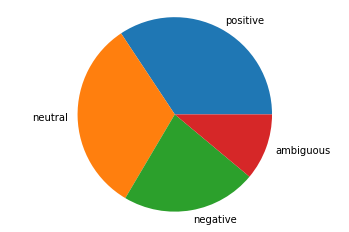

In [ ]:
# Sentiment Pie Chart
sentimentChart = np.array([p,n,neg,a]) # setting the sentiment pie chart
sentimentChartLabels = ["positive", "neutral", "negative", "ambiguous"]

plt.pie(sentimentChart, labels = sentimentChartLabels)
plt.axis('equal')
plt.savefig('sentiment_piechart.png', dpi = 300)
plt.show()

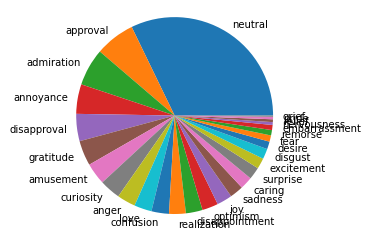

In [ ]:
# Emotions Pie Chart
labels = []
sizes = []

for x, y in emotions_lst.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)
plt.axis('equal')
plt.savefig('emotions_piechart.png', dpi = 300)
plt.show()

## Step 2.1 : Size of Vocabulary  


In [ ]:
# Size of vocabulary
cv = CountVectorizer(stop_words='english', decode_error='ignore')   
X = cv.fit_transform(text)
vocab_size = cv.get_feature_names_out().shape[0]
print(f'Size of vocabulary is : {vocab_size}')

Size of vocabulary is : 30148


## Step 2.2 : Training and Testing Splits

In [ ]:
#ASK training and testing for each emotion and sentiment or together
# ie. what are the X cols and what are the y cols

# X,y = df[],df[]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X = cv.fit_transform(df.text)
#I'm sure there is a faster way to do for both, by my method is just creating 2 objects for both
#for emotion classification 
X_train, X_test, y_train, y_test = train_test_split(X, df.emotion, test_size=0.2)

#for sentiment classification 
A_train, A_test, B_train, B_test = train_test_split(X, df.sentiment, test_size=0.2)



f = open('performance.txt','a')

## Step 2.3 : Train and Test Classifiers with a 80-20 Train-test split


In [ ]:
# 2.3.1 Multinomial Naive Bayes Classifier with default parameters

#for emotions
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
y_predict = MNB.predict(X_test)

#for sentiments
MNB1 = MultinomialNB()
MNB1.fit(A_train,B_train)
sent_predict = MNB1.predict(A_test)

print('\n\n\t\t-------------- 2.3.1 Multinomial Naive Bayes Classifier with Default Parameter-------------\n\n')

print(" Confusion Matrix for the Emotions: \n" + str(metrics.confusion_matrix(y_test, y_predict)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, y_predict)))


print(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, sent_predict)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, sent_predict)))




In [ ]:
# 2.3.2 Decision Tree with default parameters

#for emotions
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
dec_predict = clf.predict(X_test)

#for sentiments
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(A_train,B_train)
dec1_predict = clf1.predict(A_test)


print('\n\n\t\t--- 2.3.2 Decision Tree CLASSIFIER with default parameters---\n\n')

print(" Confusion Matrix for the Emotions: \n" + str(metrics.confusion_matrix(y_test,dec_predict)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, dec_predict)))


print(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, dec1_predict)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, dec1_predict)))





		--- 2.3.2 Decision Tree CLASSIFIER with default parameters---


 Confusion Matrix for the Emotions: 
[[1255   48   14   40  112   24   13   19   19    9   19    5    4   45
     4   48    4   47   80    1  244   20    5   10    1    3    4   23]
 [  39  752   26   33   22    6   18    4    4    6   17   12    1   13
     1    5    0   41    9    0  140    7    0   10    4    1    1   10]
 [  18   20  395  156   34   11   25   19    5   31   38   33    2    8
    10    3    1    6    3    0  221    2    2    6    2    0    5    9]
 [  44   64  213  388  118   23   33   33    9   62   97   59   16    9
    18    6    0    9    2    3  350   12    1   12    0    6   10   11]
 [ 217   60   55  129  607   51   47   36   27   57   67   14   10   27
     6   23    1   36   43    3  638   41    2   22    3    1   11   10]
 [  36   17   13   35   81  193   10   10    3   12   16    3    2    6
     5   17    1    9    3    8  190   19    0    3    2    7   11    0]
 [  21   21   26   65   6

In [ ]:
# 2.3.3 Multi-Layered Perceptron with default parameters 


# I have been running this for 6 hours now and it still hasn't converged. Either the code is wrong or it just takes a long time.
# I have  just a regular laptop, if you guys have a stronger pc, please try and run and let me know. 
#Update: So it ran for about 9 hours total, and the output basically said that it ran for the default of 200 epochs and it still didn't converge, so now I've set max iterations to only 10 

#for emotions
MLP = MLPClassifier(max_iter=10)
MLP.fit(X_train, y_train)
mlp_predict = MLP.predict(X_test)

#for sentiments
MLP1 = MLPClassifier(max_iter=10)
MLP1.fit(A_train, B_train)
mlp1_predict = MLP1.predict(A_test)



print('\n\n\t\t--- 2.3.3 Multi Layered Perceptron CLASSIFIER with default parameters ---\n\n')

print(" Confusion Matrix for the Emotions: \n"+ str(metrics.confusion_matrix(y_test,mlp_predict)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, mlp_predict)))


print(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, mlp1_predict)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, mlp1_predict)))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,




		--- 2.3.3 Multi Layered Perceptron CLASSIFIER with default parameters ---


 Confusion Matrix for the Emotions: 
[[1132   35   15   18   92   13   10   17   12    7   12    5    3   47
     4   58    1   72   78    2  372   39   12   18    3    4    5   34]
 [  26  702   15   29   16    7    9    4    3    4   14    7    1   16
     2    5    0   59    6    1  209   13    1    9    5    1    6   12]
 [  14   12  325  107   26   11   12   11    3   22   38   33    5    4
    13    6    1    6    5    3  351    7    1   17    3    4   11   14]
 [  33   50  132  254   62   19   27   24   12   49   86   72   22   12
    16    5    1   17   10    5  604   25    1   26    0    6   21   17]
 [ 163   46   33   46  371   35   30   23   23   37   60   16   16   21
     8   33    2   53   45    6 1002   56    3   58   10   12   16   20]
 [  28    8    4   19   37  157    5    8    6    8    9    6    3    6
     7   16    2   14    3    5  263   50    0    9    4   16   17    2]
 [  19   23  

In [ ]:
# 2.3.4 Better performing Multinomial Naive Bayes Classifier using GridSearch


param_grid = {
             "alpha": [10, 5, 0.5, 0] # Got an error when using 0.5 and 0, so moved them to over 1, not sure what to do 
             }

#for emotions
grid_search = GridSearchCV(MNB, param_grid)
grid_search = grid_search.fit(X_train, y_train)
grid_predict = grid_search.predict(X_test)

#for sentiments
grid_search1 = GridSearchCV(MNB1, param_grid)
grid_search1 = grid_search1.fit(A_train, B_train)
grid_predict1 = grid_search1.predict(A_test)


print('\n\n\t\t---- 2.3.4 MNB with GridSearch--------\nHyper parameters: alpha = [300, 20, 0.5, 0]\n ')


print(" \nConfusion Matrix for the Emotions: \n"+ str(metrics.confusion_matrix(y_test,grid_predict)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, grid_predict)))
print('\nGrid best parameters: ' + str(grid_search.best_estimator_))
print('\nGrid best score: ' + str(grid_search.best_score_))



print(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, grid_predict1)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, grid_predict1)))
print('\nGrid best parameters: ' + str(grid_search1.best_estimator_))
print('\nGrid best score: ' + str(grid_search1.best_score_))






/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr



		---- 2.3.4 MNB with GridSearch--------
Hyper parameters: alpha = [300, 20, 0.5, 0]
 
 
Confusion Matrix for the Emotions: 
[[1084   20   10   18   61    9    3   16    2    6    8    1    0   13
     2   47    0   33   68    0  657   19    1    7    1    1    3   30]
 [  31  555    9   16    9    2    5    0    1    1   10    3    0    7
     0    8    0   23   10    0  472    6    0    3    1    1    2    7]
 [  14   11  203   75   17    2    8    5    1   13   25   14    1    1
     2    7    0    3    7    1  642    4    0    2    0    1    3    3]
 [  33   37   83  194   54   11   10   12    6   26   63   20    3    4
     5    8    0   11    6    0  972   10    0   12    0    2   12   14]
 [ 131   33   13   45  262   14   14   11    5   18   49    3    1    5
     5   27    0   24   33    0 1460   41    1   23    1    2   10   13]
 [  24    4    3    8   26   73    1    4    1    3    8    4    0    0
     1   17    0    5    5    0  467   31    0    5    0    8   14    0]
 [ 

In [ ]:
# 2.3.5 Better performing Decision Tree using GridSearch


tree_para = {'criterion':['gini', 'entropy'],
            'max_depth':[28, 56],               
            'min_samples_split':[137455,120,50],    
         }


tree_para1 = {
            'criterion':['gini', 'entropy'],
           'max_depth':[4, 8], #i'll try 4 and 8
           'min_samples_split':[137455,120,50], #(training sample - 1)
          } 


#FOR EMOTIONS
dt_top = GridSearchCV(DecisionTreeClassifier(),tree_para,cv=10)
dt_top.fit(X_train, y_train)
dt_predict = dt_top.predict(X_test)

#FOR SENTIMENTS
dt_top1 = GridSearchCV(DecisionTreeClassifier(),tree_para1,cv=10)
dt_top1.fit(A_train, B_train)
dt_predict1 = dt_top1.predict(A_test)


print('\n\n\t\t---- 2.3.5 DECISION TREE with GridSearch--------\nHyper parameters: criterion : [gini, entropy]\n max_depth = [3,10] \n min_samples_split = [10, 20, 50]\n ')


print(" \nConfusion Matrix for the Emotions: \n"+ str(metrics.confusion_matrix(y_test,dt_predict)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, dt_predict)))
print('\nGrid best parameters: ' + str(dt_top.best_estimator_))
print('\nGrid best score: ' + str(dt_top.best_score_))


print(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, dt_predict1)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, dt_predict1)))
print('\nGrid best parameters: ' + str(dt_top1.best_estimator_))
print('\nGrid best score: ' + str(dt_top1.best_score_))


In [ ]:
# 2.3.6 Better performing Multi-Layered Perceptron using GridSearch

MLP = MLPClassifier(max_iter=10)
MLP1 = MLPClassifier(max_iter=10)
parameter_space = {
                  'activation':['logistic','tanh','relu', 'identity'],
                  'hidden_layer_sizes' : [(100,50), (50,40,30)],
                  'solver' :['adam', 'stochastic'],
                  }

#FOR EMOTIONS
mlp_top = GridSearchCV(MLP, parameter_space, cv=10)
mlp_top.fit(X_train, y_train)
mlptop_predict = mlp_top.predict(X_test)

#FOR SENTIMENTS
mlp_top1 = GridSearchCV(MLP1, parameter_space, cv=10)
mlp_top1.fit(A_train, B_train)
mlptop_predict1 = mlp_top1.predict(A_test)



print('\n\n\t\t---- 2.3.6 MutliLayered Perceptron with GridSearch--------\nHyper parameters: activation : [sigmoid, tanh, relu, identity ]\nhidden_layer_sizes = [(100,50), (50,40,30)]\nsolver = [adam, stochastic]')


print(" \nConfusion Matrix for the Emotions: \n"+ str(metrics.confusion_matrix(y_test,mlptop_predict)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, mlptop_predict)))
print('\nGrid best parameters: ' + str(mlp_top.best_estimator_))
print('\nGrid best score: ' + str(mlp_top.best_score_))



print(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, mlptop_predict1)))
print("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, mlptop_predict1)))
print('\nGrid best parameters: ' + str(mlp_top1.best_estimator_))
print('\nGrid best score: ' + str(mlp_top1.best_score_))



## Step 2.4 : Performance of Classifiers

In [ ]:
#Writing all the outputs from the above 6 classifiers into file performance 

#same code as above, except instrad of printing, we are writing it to file
# not sure if having this all in the same code block is a good idea, might move them into separate blocks as well like above. 

f = open('performance.txt','a') #this is how I wrote to file in pycharm, not sure if it works in jupyter tho 


f.write('\n------These tests were conducted with 80% training and 20% testing split------\n\n')

#2.3.1 Multinomial Naive Bayes Classifiers with default parameters

#for emotions
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
y_predict = MNB.predict(X_test)



#for sentiments
MNB1 = MultinomialNB()
MNB1.fit(A_train,B_train)
sent_predict = MNB1.predict(A_test)



f.write('\n\n\t\t---MNB CLASSIFIER with default values---\n\n')

f.write(" Confusion Matrix for the Emotions: \n" + str(metrics.confusion_matrix(y_test, y_predict)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, y_predict)))



f.write(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, sent_predict)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, sent_predict)))






#2.3.2 Decision tree classifier

#for emotions
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
dec_predict = clf.predict(X_test)


#for sentiments
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(A_train,B_train)
dec1_predict = clf1.predict(A_test)


f.write('\n\n\t\t---Decision Tree CLASSIFIER---\n\n')

f.write(" Confusion Matrix for the Emotions: \n" + str(metrics.confusion_matrix(y_test,dec_predict)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, dec_predict)))



f.write(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, dec1_predict)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, dec1_predict)))





#2.3.3 Multi Layered Perceptron

#for emotions
MLP = MLPClassifier(max_iter=10)
MLP.fit(X_train, y_train)
mlp_predict = MLP.predict(X_test)

#for sentiments
MLP1 = MLPClassifier(max_iter=10)
MLP1.fit(A_train, B_train)
mlp1_predict = MLP1.predict(A_test)



f.write('\n\n\t\t---Multi Layered Perceptron CLASSIFIER---\n\n')

f.write(" Confusion Matrix for the Emotions: \n"+ str(metrics.confusion_matrix(y_test,mlp_predict)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, mlp_predict)))



f.write(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, mlp1_predict)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, mlp1_predict)))






#2.3.4 Multinomial Naive Bayes usign GridSearchCV



param_grid = {
          "alpha": [300, 20, 5, 140] # Get an error when using 0.5 and 0
          }

#for emotions
grid_search = GridSearchCV(MNB, param_grid)
grid_search = grid_search.fit(X_train, y_train)
grid_predict = grid_search.predict(X_test)

#for sentiments
grid_search1 = GridSearchCV(MNB1, param_grid)
grid_search1 = grid_search1.fit(A_train, B_train)
grid_predict1 = grid_search1.predict(A_test)


f.write('\n\n\t\t---- MNB with GridSearch--------\nHyper parameters: alpha = [300,20,5,140]\n ')


f.write(" \nConfusion Matrix for the Emotions: \n"+ str(metrics.confusion_matrix(y_test,grid_predict)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, grid_predict)))
f.write('\nGrid best parameters: ' + str(grid_search.best_estimator_))
f.write('\nGrid best score: ' + str(grid_search.best_score_))



f.write(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, grid_predict1)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, grid_predict1)))
f.write('\nGrid best parameters: ' + str(grid_search1.best_estimator_))
f.write('\nGrid best score: ' + str(grid_search1.best_score_))








#2.3.5 Top DT


tree_para = {'criterion':['gini', 'entropy'],
            'max_depth':[3, 10],
            'min_samples_split':[10,20,50],
         }


#FOR EMOTIONS
dt_top = GridSearchCV(DecisionTreeClassifier(),tree_para,cv=10)
dt_top.fit(X_train, y_train)
dt_predict = dt_top.predict(X_test)

#FOR SENTIMENTS
dt_top1 = GridSearchCV(DecisionTreeClassifier(),tree_para,cv=10)
dt_top1.fit(A_train, B_train)
dt_predict1 = dt_top1.predict(A_test)


f.write('\n\n\t\t---- DECISION TREE with GridSearch--------\nHyper parameters: criterion : [gini, entropy]\n max_depth = [3,10] \n min_samples_split = [10, 20, 50]\n ')


f.write(" \nConfusion Matrix for the Emotions: \n"+ str(metrics.confusion_matrix(y_test,dt_predict)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, dt_predict)))
f.write('\nGrid best parameters: ' + str(dt_top.best_estimator_))
f.write('\nGrid best score: ' + str(dt_top.best_score_))


f.write(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, dt_predict1)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, dt_predict1)))
f.write('\nGrid best parameters: ' + str(dt_top1.best_estimator_))
f.write('\nGrid best score: ' + str(dt_top1.best_score_))






#2.3.6 Top MPL

parameter_space = {
  'activation':['sigmoid','tanh','relu', 'identity'],
   'hidden_layer_sizes' : [(100,50), (50,40,30)],
    'solver' :['adam', 'stochastic'],
}

#FOR EMOTIONS
mlp_top = GridSearchCV(MLP, parameter_space, cv=10)
mlp_top.fit(X_train, y_train)
mlptop_predict = mlp_top.predict(X_test)

#FOR SENTIMENTS
mlp_top1 = GridSearchCV(MLP1, parameter_space, cv=10)
mlp_top1.fit(A_train, B_train)
mlptop_predict1 = mlp_top1.predict(A_test)



f.write('\n\n\t\t---- MutliLayered Perceptron with GridSearch--------\nHyper parameters: activation : [sigmoid, tanh, relu, identity ]\nhidden_layer_sizes = [(100,50), (50,40,30)]\nsolver = [adam, stochastic]')


f.write(" \nConfusion Matrix for the Emotions: \n"+ str(metrics.confusion_matrix(y_test,mlptop_predict)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(y_test, mlptop_predict)))
f.write('\nGrid best parameters: ' + str(mlp_top.best_estimator_))
f.write('\nGrid best score: ' + str(mlp_top.best_score_))



f.write(" \n\nConfusion Matrix for the Sentiments: \n" + str(metrics.confusion_matrix(B_test, mlptop_predict1)))
f.write("\n\n Classification Report for the emotions : \n" + str(metrics.classification_report(B_test, mlptop_predict1)))
f.write('\nGrid best parameters: ' + str(mlp_top1.best_estimator_))
f.write('\nGrid best score: ' + str(mlp_top1.best_score_))




2.5 Run all 6 classifiers again with different Test-Training split 

In [ ]:
# Same code as above, except change the size of the training and split sets, and write to a new file  



3.0

In [ ]:
import gensim.downloader as api
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
from nltk import word_tokenize 


# 3.1

In [ ]:
model = api.load("word2vec-google-news-300")  # download the model and return as object ready for use

# 3.2

In [ ]:
counter = 0
redVec = [nltk.word_tokenize(t) for t in df.text]
for sentence in redVec:
    counter += len(sentence)
print(counter)

In [ ]:
texts = df['text'].tolist()
tokens = list(map(len, map(nltk.word_tokenize, texts)))
total = sum(tokens)
print(total)

# 3.3 : Embeddings 

In [ ]:
google_embedding = list(model.wv.vocab)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(google_embedding)
X_train_counts.shape 
google = count_vect.vocabulary_


In [ ]:
# transforms given text into frequency (count) of each word that occurs in the entire text
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(texts)
X_train_counts.shape 
reddit = count_vect.vocabulary_

# 3.4 

In [ ]:
hits = len(set(google.keys()).intersection(reddit.keys()))
overall = hits/total
overall

# 3.5

In [ ]:
MLP = MLPClassifier(max_iter=10)
MLP.fit(redVec, model) 
mlp_predict = MLP.predict()

# 3.6


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (3,2), learning_rate = 0.01, activation ='relu')
mlp.fit(redVec, model) #not sure if this is the proper inputs

In [ ]:
from sklearn.semi_supervised.tests.test_self_training import X_test
pred_mlp = mlp.predict(X_test)

#3.7

In [ ]:
f.open